# Trees

In [1]:
from pathlib import Path

In [2]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

### Examples
* file structures 
* webpage html 
* species trees

### Properties of trees

* All the children of one node are independent of the children of another node 
* Each leaf node is unique 

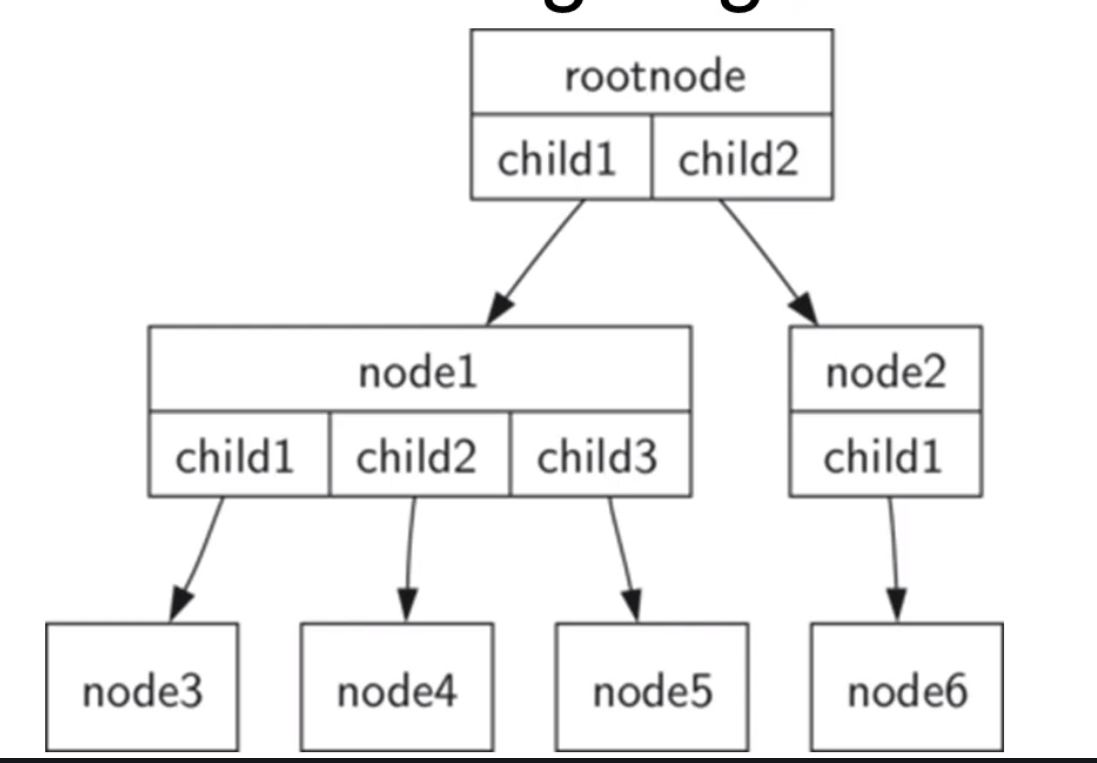

In [3]:
from IPython.display import Image
filename = 'trees.png'
Image(pics/filename)

## Terminology

* A **node** is the fundamental part of a tree. A node has a payload also known as the additional information 
* An **edge** connects two nodes to show there is a relationship between nodes
* Every node is connected by exactly one incoming edge from another node
* **Siblings** have the same parent node
* **leaf nodes** have no children
* **height** is the maximum level of any node in the tree
* node 1 and 2 are on the first level

## Binary trees

* a unique path traverses from the root node to the node of interest
* a binary tree is a tree where there are a maximum 2 children per node

## Recursive Definition of a Tree

* A tree is either empty or consists of a root and zero or more subtrees, each of which is also a tree 
* The root of each subtree is connected to the root of the parent tree by an edge

![image](md_images/recursion-tree.png)

# Tree Representation Implementation (Lists)

Below is a representation of a Tree using a list of lists. Refer to the video lecture for an explanation and a live coding demonstration!

In [4]:
def BinaryTree(r):
    return [r, [], []]

def insertLeft(root,newBranch):
    t = root.pop(1)
    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch, [], []])
    return root

def insertRight(root,newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

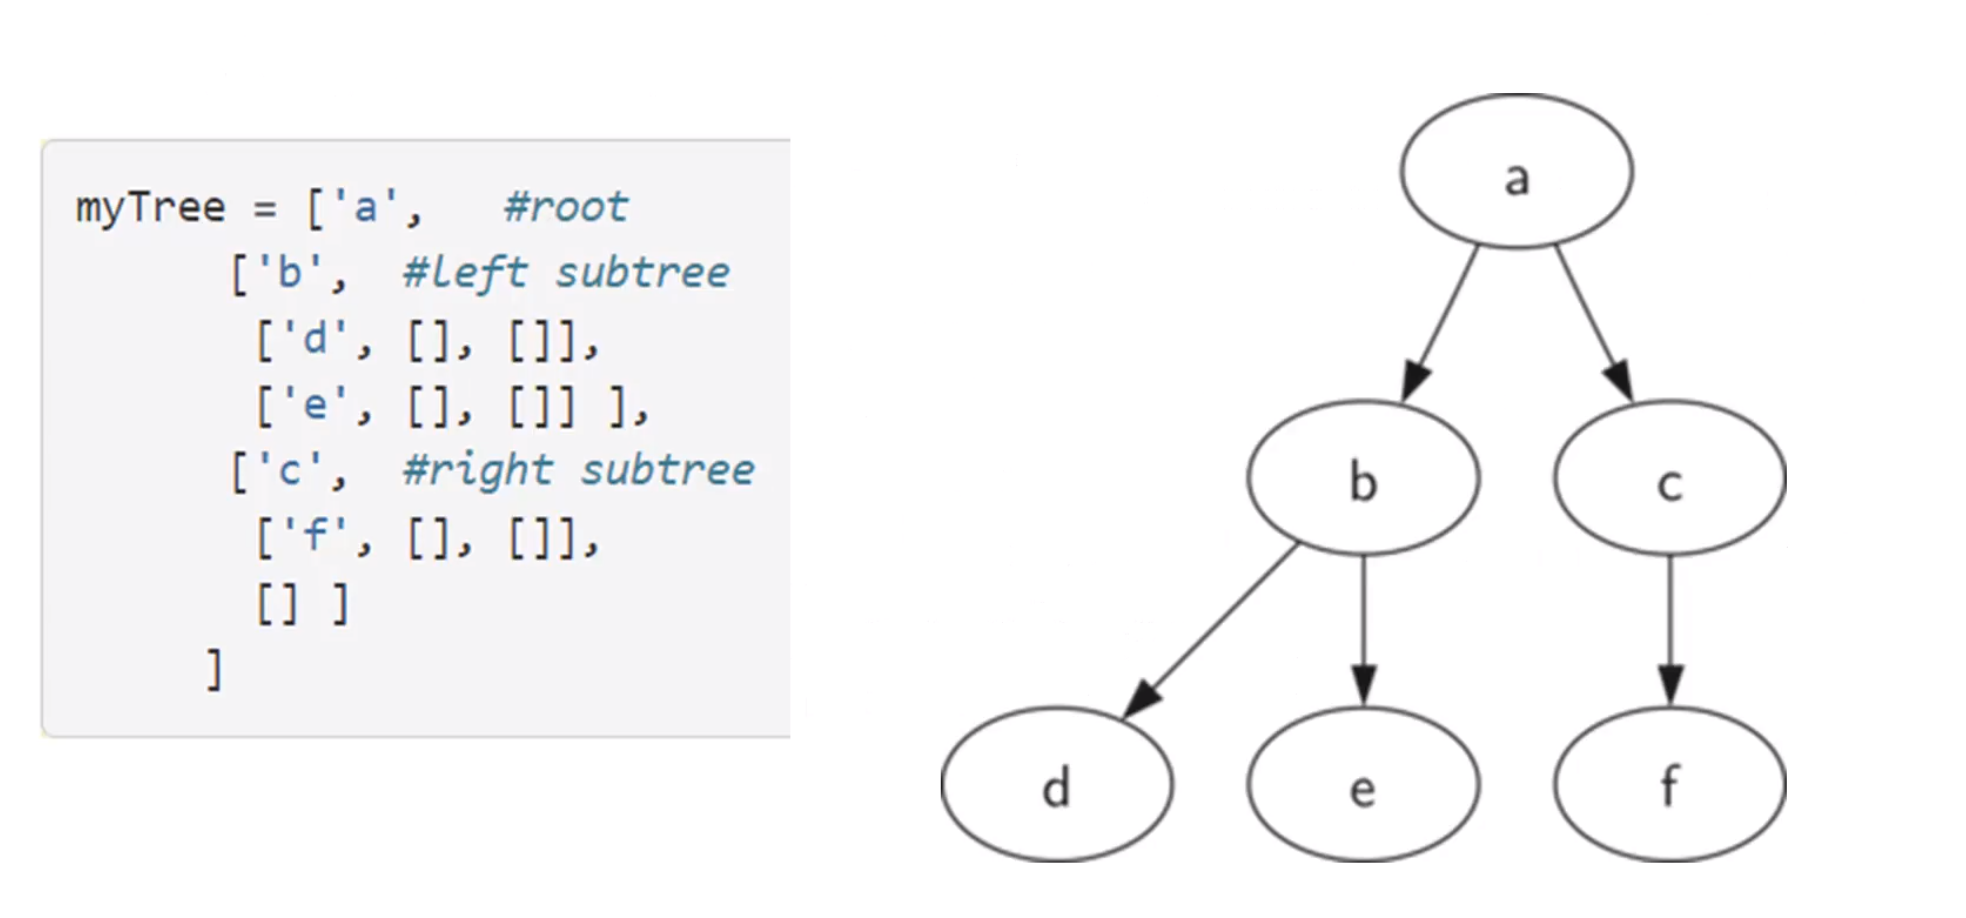

In [5]:
from IPython.display import Image
filename = 'tree-example.png'
Image(pics/filename)

In [6]:
myTree = BinaryTree('a')
insertLeft(myTree, 'b')
insertRight(myTree, 'c')
insertLeft(getLeftChild(myTree),'d')
insertRight(getLeftChild(myTree),'e')
insertLeft(getRightChild(myTree),'f')
# insertLeft(getLeftChild(myTree), 'olli')
myTree

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]

In [7]:
getLeftChild(myTree)

['b', ['d', [], []], ['e', [], []]]

# Nodes and References Implementation of a Tree

In this notebook is the code corresponding to the lecture for implementing the representation of a Tree as a class with nodes and references!

In [8]:
# this is best thought of a as recursive definition
class BinaryTree(object):
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            # push the existing child down one level
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key
    
    def preorder(self):
        print(self.key)
        if self.leftChild:
            self.leftChild.preorder()
        if self.rightChild:
            self.rightChild.preorder()
            
    def inorder(self):
        if self.leftChild:
            self.leftChild.inorder()
        print(self.key)
        if self.rightChild:
            self.rightChild.inorder()
    
    def postorder(self):
        if self.leftChild:
            self.leftChild.postorder()
        if self.rightChild:
            self.rightChild.postorder()
        print(self.key)

We can see some examples of creating a tree and assigning children. Note that some outputs are Trees themselves!

In [9]:
r = BinaryTree('Chapter 1')
print('root : ',r.getRootVal())
print('root left child : ',r.getLeftChild())
print('root right child : ',r.getRightChild())
r.insertLeft('Section 1.1')
print('root left child after insertLeft: ', r.getLeftChild())
print('root left child value: ',r.getLeftChild().getRootVal())
r.insertRight('Section 1.2')
print('root right child after insertRight: ',r.getRightChild())
print('root right child value :',r.getRightChild().getRootVal())

r.rightChild.insertLeft('Section 1.2.1')
r.rightChild.insertRight('Section 1.2.2')

root :  Chapter 1
root left child :  None
root right child :  None
root left child after insertLeft:  <__main__.BinaryTree object at 0x000002051AD31C08>
root left child value:  Section 1.1
root right child after insertRight:  <__main__.BinaryTree object at 0x000002051AD31548>
root right child value : Section 1.2


In [10]:
r.preorder()

Chapter 1
Section 1.1
Section 1.2
Section 1.2.1
Section 1.2.2


## Tree Traversal order (using recursion)

### Preorder (reading the book back to front)
1. ROOT
2. LEFT SUBTREE
3. RIGHT SUBTREE

### Inorder 
1. LEFT SUBTREE 
2. ROOT
3. RIGHT SUBTREE

### Postorder
1. LEFT SUBTREE 
2. RIGHT SUBTREE
3. ROOT

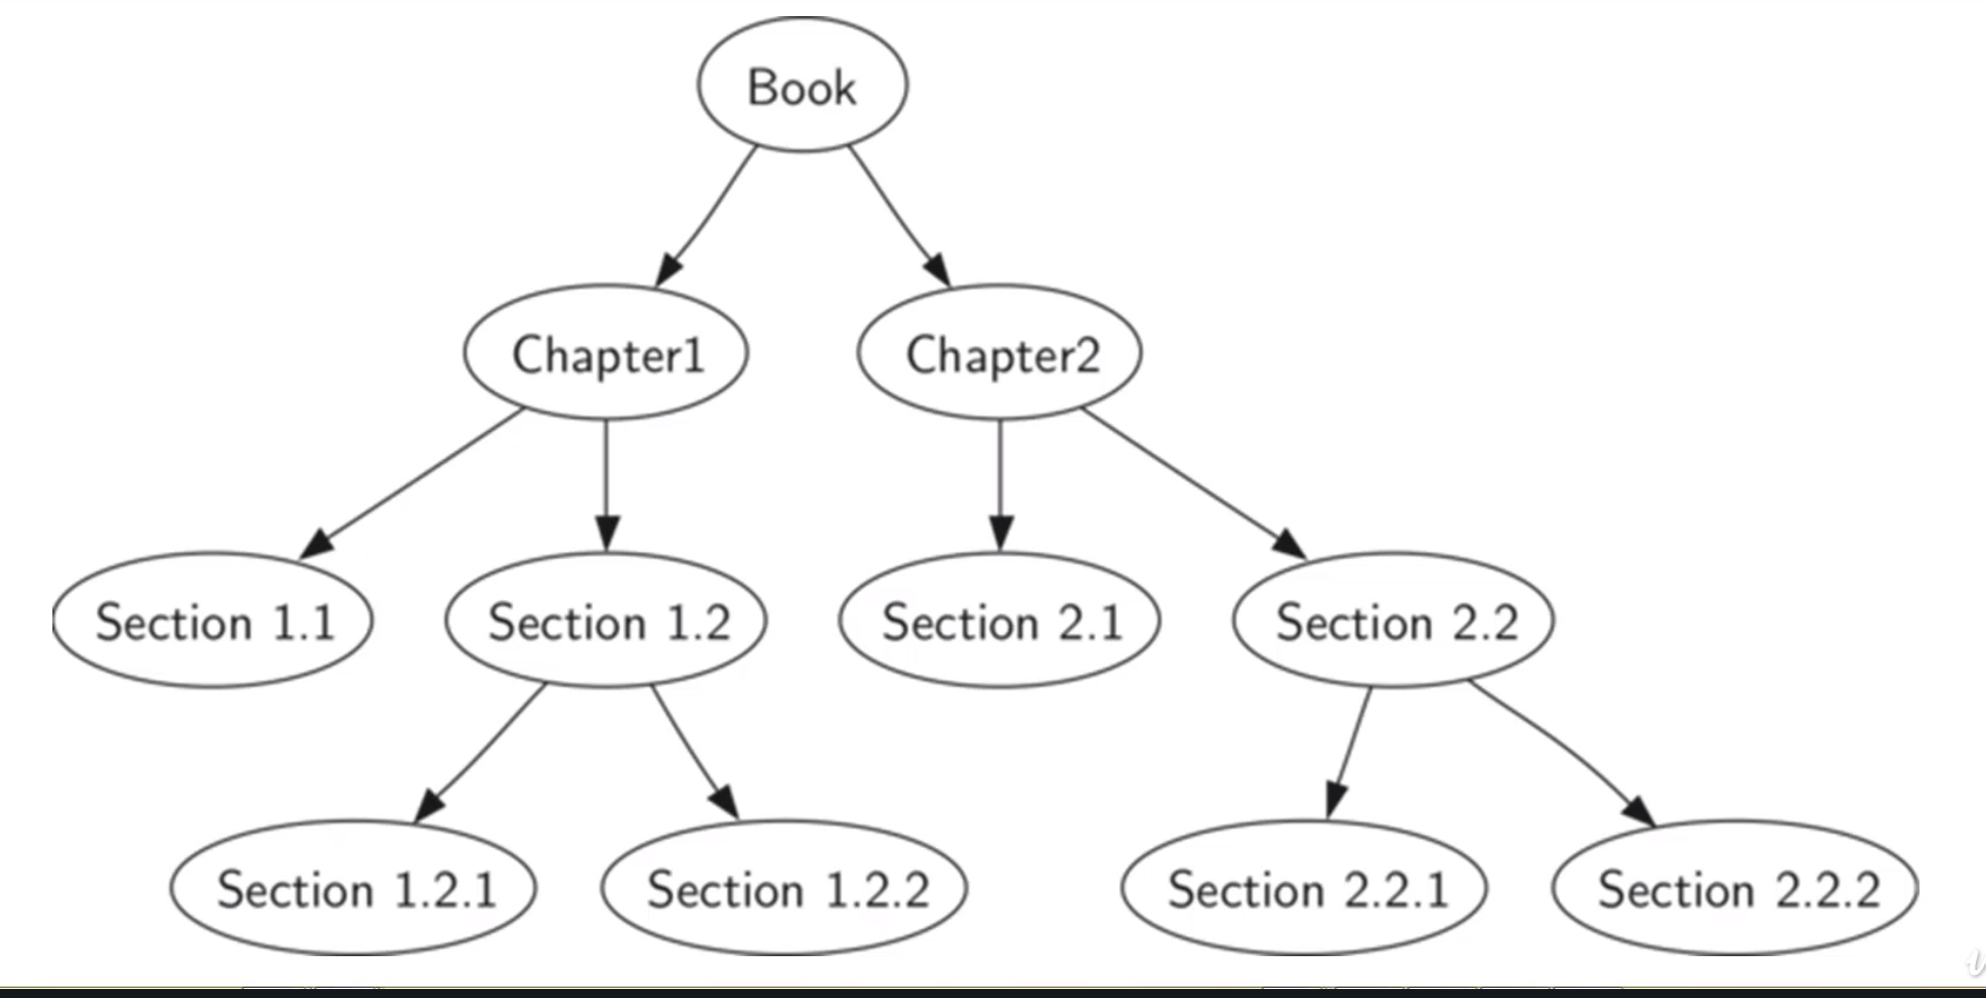

In [11]:
from IPython.display import Image
filename = 'textbook.png'
Image(pics/filename)

In [12]:
# eg preorder function call 
def preorder(tree):
    if tree: 
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())
        
def inorder(tree):
    if tree:
        inorder(tree.getLeftChild())
        print(tree.getRootVal())
        inorder(tree.getRightChild())
        
def postorder(tree):
    if tree:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

In [13]:
# Root L R 
preorder(r)

Chapter 1
Section 1.1
Section 1.2
Section 1.2.1
Section 1.2.2


In [14]:
# L Root R
inorder(r)

Section 1.1
Chapter 1
Section 1.2.1
Section 1.2
Section 1.2.2


In [15]:
# L R Root
postorder(r)

Section 1.1
Section 1.2.1
Section 1.2.2
Section 1.2
Chapter 1


# Binary Heaps 

* Variation of a queue 
* Acts like a queue in that you can dequeue an item by removing it from the front 
* The **order** is determined by their **priority** 
* When you enqueue an item it may move all the way to the front

Time complexity : Enqueue and dequeue with O(logN)

## HEAP PROPERTY
* the key stored in each node is either greater than or equal to (≥) or less than or equal to (≤) the keys in the node's children

#### MIN HEAP(≤)
* Smallest key is always at the front

#### MAX HEAP(≥)
* largest key is at the front 

WIKIPEDIA RESOURCE : [Binary Heap Resource](https://en.wikipedia.org/wiki/Binary_heap)

# Binary Heap Implementation

Here is the reference code for the Binary Heap Implementation. Make sure to refer to the video lecture for the full explanation!

### Binary Heap Operations
**The basic operations we will implement for our binary heap are as follows:**

* BinaryHeap() creates a new, empty, binary heap.
* insert(k) adds a new item to the heap.
* findMin() returns the item with the minimum key value, leaving item in the heap.
* delMin() returns the item with the minimum key value, removing the item from the heap.
* isEmpty() returns true if the heap is empty, false otherwise.
* size() returns the number of items in the heap.
* buildHeap(list) builds a new heap from a list of keys.

#### Complete Binary Tree -> Binary Heap (MIN HEAP)

* Each level has all of its nodes
* left child is at 2*p 
* right child is at 2*p+1 
* Each child is greater or equal to its parent

#### Formula for Binary Heap 
$\text{left child index} = 2*i $

$\text{right child index} = 2*i+1 $

[Min Binary Heap Resource](https://www.cs.cmu.edu/~adamchik/15-121/lectures/Binary%20Heaps/heaps.html#:~:text=the%20min%2Dheap%20property%3A%20the,value%20element%20at%20the%20root.)

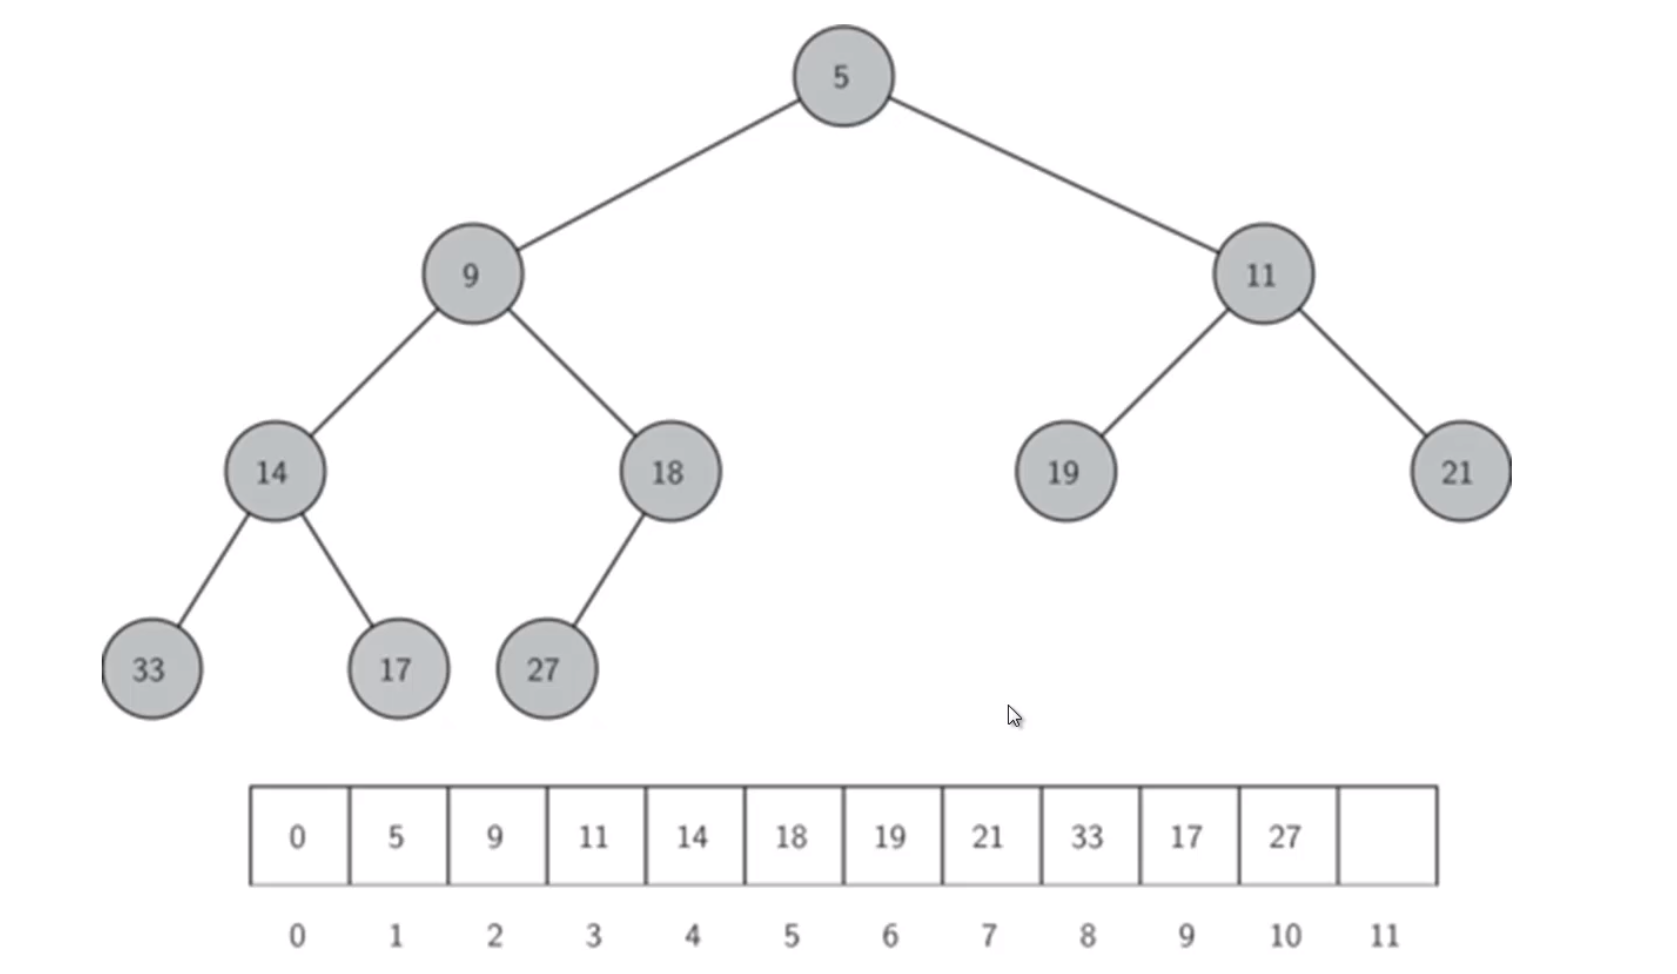

In [16]:
from IPython.display import Image
filename = 'cbt.png'
Image(pics/filename)

In [17]:
# Comparable to a complete binary tree
class BinHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    # ensure minHeap property is upheld
    def percUp(self,i):
        # move up until you are at the top of the tree
        while i // 2 > 0:
            # move up 
            if self.heapList[i] < self.heapList[i // 2]: 
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2

    def insert(self,k):
        
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def percDown(self,i):
        
        while (i * 2) <= self.currentSize:
            # where is the minChild
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    def minChild(self,i):
        # if there are only 2,4,6... elements
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1

    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self,alist):
        # O(N) time complexity bonus
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1

In [18]:
"""
       1
    3     4
  10  8 
"""
bh = BinHeap()
bh.buildHeap([1,3,4,10,8])
bh.heapList

[0, 1, 3, 4, 10, 8]

In [19]:
"""
       1
    3     2
  10 8  4
"""
bh.insert(2)
bh.heapList

[0, 1, 3, 2, 10, 8, 4]

# Binary Search Trees 

* We can use the structure to provide for efficient searching
* **BST PROPERTY** - Keys that are **less** then the parent are in the **left** subtree and keys that are **greater** then the parent are found in the **right** subtree

This is the code to go along with the video explanation. Check out the video lecture for full details!

In [20]:
class TreeNode:

    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return self.rightChild or self.leftChild

    def hasBothChildren(self):
        return self.rightChild != None and self.leftChild != None

    def replaceNodeData(self, key, value, lc, rc):
        self.key = key
        self.payload = value
        self.leftChild = lc
        self.rightChild = rc
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self

    def findSuccessor(self):
        succ = None
        if self.hasRightChild():
            succ = self.rightChild.findMin()
        else:
            # if it is not the root
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ

    def spliceOut(self):
        if self.isLeaf():
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild
                else:
                    self.parent.rightChild = self.leftChild
                    self.leftChild.parent = self.parent
            else:
                if self.isLeftChild():

                    self.parent.leftChild = self.rightChild
                else:
                    self.parent.rightChild = self.rightChild
                    self.rightChild.parent = self.parent

    def findMin(self):
        # left most child of the tree
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current

    def __iter__(self):
        # inorder traversal
        if self:
            if self.hasLeftChild():
                for elem in self.leftChild:
                    yield elem
            yield self.key, self.payload
            if self.hasRightChild():
                for elem in self.rightChild:
                    yield elem


class BinarySearchTree:

    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = TreeNode(key, val)
        self.size = self.size + 1

    # internal method, can't tab this
    def _put(self, key, val, currentNode):
        if key < currentNode.key:
            if currentNode.hasLeftChild():
                self._put(key, val, currentNode.leftChild)
            else:
                currentNode.leftChild = TreeNode(key, val, parent=currentNode)
        else:
            if currentNode.hasRightChild():
                self._put(key, val, currentNode.rightChild)
            else:
                currentNode.rightChild = TreeNode(key, val, parent=currentNode)

    def __setitem__(self, k, v):
        self.put(k, v)

    def get(self, key):
        if self.root:
            # returns a node
            res = self._get(key, self.root)
            if res:
                # access the value at that key
                return res.payload
            else:
                return None
        else:
            return None

    def _get(self, key, currentNode):
        # will return the node
        if not currentNode:
            return None
        elif currentNode.key == key:
            return currentNode
        elif key < currentNode.key:
            return self._get(key, currentNode.leftChild)
        else:
            return self._get(key, currentNode.rightChild)

    # overload getitem
    def __getitem__(self, key):
        return self.get(key)

    def __contains__(self, key):
        # if it gets anything return True
        if self._get(key, self.root):
            return True
        else:
            return False

    def delete(self, key):

        if self.size > 1:

            nodeToRemove = self._get(key, self.root)
            if nodeToRemove:
                self.remove(nodeToRemove)
                self.size = self.size-1
            else:
                raise KeyError('Error, key not in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError('Error, key not in tree')

    # operator overload allows us to use del
    def __delitem__(self, key):
        self.delete(key)

    def remove(self, currentNode):

        if currentNode.isLeaf():  # leaf
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        elif currentNode.hasBothChildren():  # interior
            # find the succesor
            # the successor is the next largest value in the subtree
            succ = currentNode.findSuccessor()
            # splice out the
            succ.spliceOut()
            # change the key and payload of the currentNode
            currentNode.key = succ.key
            currentNode.payload = succ.payload

        else:  # this node has one child
            # point the child and parent to one another
            # node that has left child
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                # root case
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.key,
                                                currentNode.leftChild.payload,
                                                currentNode.leftChild.leftChild,
                                                currentNode.leftChild.rightChild)
            # node has only right child
            else:
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.key,
                                                currentNode.rightChild.payload,
                                                currentNode.rightChild.leftChild,
                                                currentNode.rightChild.rightChild)


In [21]:
mytree = BinarySearchTree()
mytree[5] = "red"
mytree[15] = "blue"
mytree[3] = "yellow"
mytree[1] = "pink"
mytree[4] = "orange"
mytree[10] = "grey"
mytree[20] = "black"
mytree[8] = "green"
mytree[11] = "light blue"
mytree[22] = "dark green"
del mytree[15]

for key, payload in mytree.root:
    print(f'key : {key} payload : {payload}')

key : 1 payload : pink
key : 3 payload : yellow
key : 4 payload : orange
key : 5 payload : red
key : 8 payload : green
key : 10 payload : grey
key : 11 payload : light blue
key : 20 payload : black
key : 22 payload : dark green


# Interview Problems 

---

# Binary Search Tree Check - SOLUTION

## Problem Statement

Given a binary tree, check whether it’s a binary search tree or not.

**Again, no solution cell, just worry about your code making sense logically. Hint: Think about tree traversals.**

## Solution

Here is a simple solution- If a tree is a binary search tree, then traversing the **tree inorder** should lead to **sorted order** of the values in the tree. So, we can perform an inorder traversal and check whether the node values are sorted or not. 

In [22]:
class Node:
    def __init__(self, k, val):
        self.key = k
        self.value = val
        self.left = None
        self.right = None
        

tree = Node(10, "Hello")
tree.left = Node(5, "Five")
tree.right= Node(30, "Thirty")

In [23]:
tree_vals = []

def inorder(tree):
    if tree != None:
        inorder(tree.left)
        tree_vals.append(tree.value)
        inorder(tree.right)
            
def sort_check(tree_vals):
    return tree_vals == sorted(tree_vals)

inorder(tree)
sort_check(tree_vals)

True

Another classic solution is to keep track of the minimum and maximum values a node can take. And at each node we will check whether its value is between the min and max values it’s allowed to take. The root can take any value between negative infinity and positive infinity. At any node, its left child should be smaller than or equal than its own value, and similarly the right child should be larger than or equal to. So during recursion, we send the current value as the new max to our left child and send the min as it is without changing. And to the right child, we send the current value as the new min and send the max without changing.

In [24]:
class Node:
    def __init__(self, k, val):
        self.key = k
        self.value = val
        self.left = None
        self.right = None

def tree_max(node):
    if not node:
        return float("-inf")
    maxleft  = tree_max(node.left)
    maxright = tree_max(node.right)
    return max(node.key, maxleft, maxright)

def tree_min(node):
    if not node:
        return float("inf")
    minleft  = tree_min(node.left)
    minright = tree_min(node.right)
    return min(node.key, minleft, minright)

def verify(node):
    if not node:
        return True
    if (tree_max(node.left) <= node.key <= tree_min(node.right) and
        verify(node.left) and verify(node.right)):
        return True
    else:
        return False

root = Node(10, "Hello")
root.left = Node(5, "Five")
root.right= Node(30, "Thirty")

print(verify(root)) # prints True, since this tree is valid

root = Node(10, "Ten")
root.right = Node(20, "Twenty")
root.left = Node(5, "Five")
root.left.right = Node(15, "Fifteen")

print(verify(root)) # prints False, since 15 is to the left of 10

True
False


This is a classic interview problem, so feel free to just **Google search "Validate BST"** for more information on this problem!

## Good Job!

---
# Tree Level Order Print - SOLUTION

Given a binary tree of integers, print it in level order. The output will contain space between the numbers in the same level, and new line between different levels. For example, if the tree is: 
___
![title](md_images/tree_print.png)
___
The output should be: 

    1 
    2 3 
    4 5 6

## Solution

It won’t be practical to solve this problem using recursion, because **recursion is similar to depth first search**, but what we need here is **breadth first search**. So we will use a queue as we did previously in breadth first search. First, we’ll push the root node into the queue. Then we start a while loop with the condition queue not being empty. Then, at each iteration we pop a node from the beginning of the queue and push its children to the end of the queue. Once we pop a node we print its value and space.

To print the new line in correct place we should count the number of nodes at each level. We will have 2 counts, namely current level count and next level count. Current level count indicates how many nodes should be printed at this level before printing a new line. We decrement it every time we pop an element from the queue and print it. Once the current level count reaches zero we print a new line. Next level count contains the number of nodes in the next level, which will become the current level count after printing a new line. We count the number of nodes in the next level by counting the number of children of the nodes in the current level. Understanding the code is easier than its explanation:

In [25]:
class Node:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val =  val 

In [26]:
import collections

def levelOrderPrint(tree):
    if not tree:
        return
    nodes=collections.deque([tree])
    currentCount, nextCount = 1, 0
    while len(nodes)!=0:
        currentNode=nodes.popleft()
        currentCount-=1
        print(currentNode.val)
        if currentNode.left:
            nodes.append(currentNode.left)
            nextCount+=1
        if currentNode.right:
            nodes.append(currentNode.right)
            nextCount+=1
        if currentCount==0:
            #finished printing current level
            print('\n')
            currentCount, nextCount = nextCount, currentCount

In [28]:
root = Node(10)
root.left = Node(5)
root.left.left = Node(2)
root.left.right = Node(7)
root.right= Node(30)
root.right.right = Node(35)
root.right.left = Node(28)
levelOrderPrint(root)

10


5
30


2
7
28
35




The time complexity of this solution is O(N), which is the number of nodes in the tree, so it’s optimal. Because we should visit each node at least once. The space complexity depends on maximum size of the queue at any point, which is the most number of nodes at one level. The worst case occurs when the tree is a complete binary tree, which means each level is completely filled with maximum number of nodes possible. In this case, the most number of nodes appear at the last level, which is (N+1)/2 where N is the total number of nodes. So the space complexity is also O(N). Which is also optimal while using a queue. 

Again, this is a very common tree interview question!

## Good Job!

----
# Trim a Binary Search Tree - SOLUTION

## Problem Statement

Given the root of a binary search tree and 2 numbers min and max, trim the tree such that all the numbers in the new tree are between min and max (inclusive). The resulting tree should still be a valid binary search tree. So, if we get this tree as input:
___

![title](md_images/bst1.png)
___
and we’re given **min value as 5** and **max value as 13**, then the resulting binary search tree should be: 
___
![title](md_images/bst_trim.png)
___
We should remove all the nodes whose value is not between min and max. 

___

## Solution

We can do this by performing a **post-order traversal** of the tree. We first process the left children, then right children, and finally the node itself. So we form the new tree bottom up, starting from the leaves towards the root. As a result while processing the node itself, both its left and right subtrees are valid trimmed binary search trees (may be NULL as well).

At each node we’ll return a reference based on its value, which will then be assigned to its parent’s left or right child pointer, depending on whether the current node is left or right child of the parent. If current node’s value is between min and max (min<=node<=max) then there’s no action need to be taken, so we return the reference to the node itself. If current node’s value is less than min, then we return the reference to its right subtree, and discard the left subtree. Because if a node’s value is less than min, then its left children are definitely less than min since this is a binary search tree. But its right children may or may not be less than min we can’t be sure, so we return the reference to it. Since we’re performing bottom-up post-order traversal, its right subtree is already a trimmed valid binary search tree (possibly NULL), and left subtree is definitely NULL because those nodes were surely less than min and they were eliminated during the post-order traversal. Remember that in post-order traversal we first process all the children of a node, and then finally the node itself.

Similar situation occurs when node’s value is greater than max, we now return the reference to its left subtree. Because if a node’s value is greater than max, then its right children are definitely greater than max. But its left children may or may not be greater than max. So we discard the right subtree and return the reference to the already valid left subtree. The code is easier to understand:

In [29]:
def trimBST(tree, minVal, maxVal): 
    
    if not tree:  
        return 
    
    tree.left=trimBST(tree.left, minVal, maxVal) 
    tree.right=trimBST(tree.right, minVal, maxVal) 
    
    if minVal<=tree.val<=maxVal: 
        return tree 
    
    if tree.val<minVal: 
        return tree.right 
    
    if tree.val>maxVal: 
        return tree.left 

In [30]:
root = Node(10)
root.left = Node(5)
root.left.left = Node(2)
root.left.right = Node(7)
root.right= Node(30)
root.right.right = Node(35)
root.right.left = Node(28)
levelOrderPrint(trimBST(root,2,20))

10


5


2
7




The complexity of this algorithm is O(N), where N is the number of nodes in the tree. Because we basically perform a post-order traversal of the tree, visiting each and every node one. This is optimal because we should visit every node at least once. This is a very elegant question that demonstrates the effectiveness of recursion in trees. 

# Good Job!